## Augemtation

For drosophila try major color augmentation.  In this example need to detect red eyes and white ones from a training sample with mostly one type, major color augmentation will hopefully teach the system to be robust to color differences. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


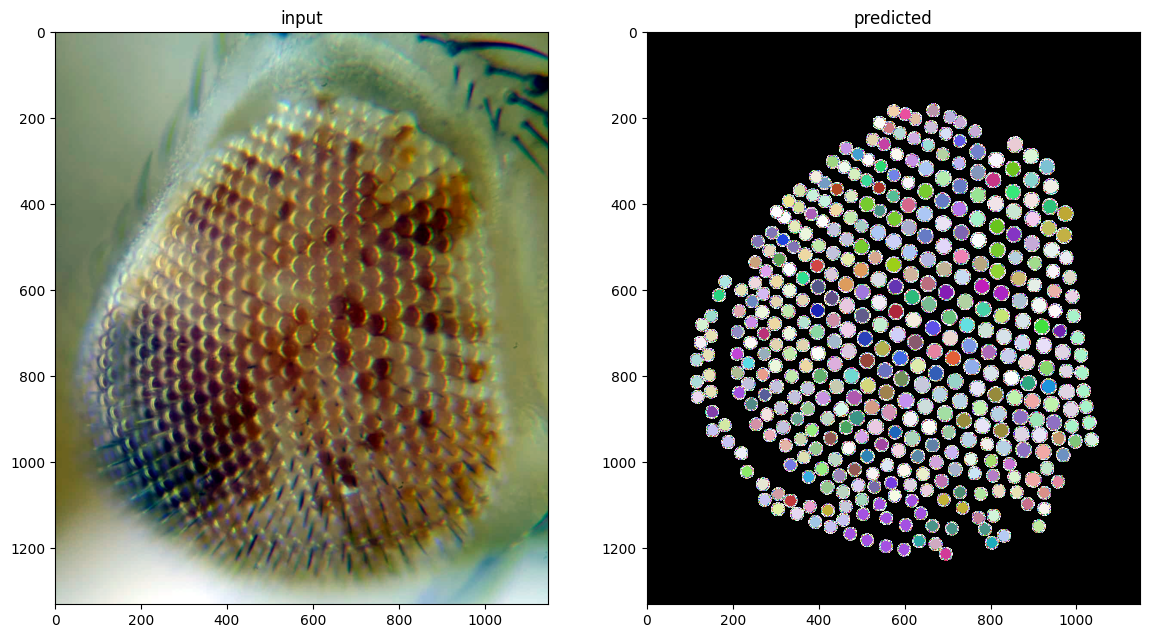

In [1]:
from cProfile import label
from nbdime import patch
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
from sympy import im
from tnia.plotting.plt_helper import imshow_multi2d
import napari
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization
from tnia.deeplearning.dl_helper import random_label_cmap
from csbdeep.utils import normalize

tnia_images_path = Path(r'D:\images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_01_18_drosophila_eye')
label_path = parent_path / 'labels'
patch_path = parent_path / 'patches'

test_name='eye3.jpeg'

label_name = test_name.split('.')[0]+'-labels-corrected.tif'

image = imread(parent_path  / test_name) 
image = normalize(image,1,99.8, axis=(0,1))

labels = imread(label_path / label_name)

fig = imshow_multi2d([image,labels],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

In [3]:
from tnia.deeplearning.augmentation import uber_augmenter
import os

if not os.path.exists(patch_path):
    os.mkdir(patch_path)
axes = 'YX'
sub_sample = 1

uber_augmenter(image, labels, patch_path, 'eyes', 256, 500, do_random_gamma=True, do_color_jitter=True)



c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:221: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_18_drosophila_eye\patches\ground truth0/eyes_442.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:221: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_18_drosophila_eye\patches\ground truth0/eyes_443.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:221: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_18_drosophila_eye\patches\ground truth0/eyes_444.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:221: UserWarning: D:\images\tnia-python-images\imagesc\2024_01_18_drosophila_eye\patches\ground truth0/eyes_445.tif is a low contrast image
  imsave(patch_n